### Importaciones

In [270]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, Function, dsolve, exp, sin, pi, tan, sympify

### Definicion de la funcion

In [271]:
def funcion_f(ecuacion:str="x"):
    function = sp.sympify(ecuacion)
    return function

In [272]:
# Definir el símbolo t
t = sp.symbols('t')

# Definir la función simbólica
#funcion_simbolica = 2 * sp.atan(sp.tan(3/20) * sp.exp(sp.exp(t) - 1))
#funcion_simbolica = 2 * sp.atan(sp.tan(301/2000) * sp.exp(sp.exp(t) - 1))
funcion_simbolica = 2 * sp.atan(sp.tan(151/1000) * sp.exp(sp.exp(t) - 1))



funcion_simbolica

2*atan(0.152158214864277*exp(exp(t) - 1))

*Digite el numero de iteraciones deseadas:*

In [273]:
numero_iteraciones = 8

*Digite el valor inicial en t:*

In [274]:
paso_inicial_T = -4

*Digite el valor final en t:*

In [275]:
paso_final_T = 4

*Digite la condicion inicial de $x(t)$:*

In [276]:
#paso_inicial_X = 0.113133703876801
paso_inicial_X = 0.113515741506437
paso_inicial_X = 0.113897828780627

*A continuación calcularemos el $\Delta t$*

In [277]:
delta_T = (paso_final_T - paso_inicial_T)/numero_iteraciones
delta_T

1.0

### Iniciemos con la solucion exacta

In [278]:
# Creamos una lista con un solo elemento de nuestro valore inicial de t
vector_T_funcion_real = np.array([paso_inicial_T])
        
# Iteramos para crear el vector para realizar la graficación de la funcion exacta
for iteracion in range(numero_iteraciones*10):
    t_i = (vector_T_funcion_real[iteracion] + delta_T/ 10) 
    vector_T_funcion_real = np.append(vector_T_funcion_real, t_i)

# Evaluamos la función en cada valor de tiempo y almacenamos los resultados en una lista
vector_f_solucion = [funcion_simbolica.subs({t: valor}) for valor in list(vector_T_funcion_real)]

### Definición de las variables simbolicas

In [279]:
t, x = sp.symbols('t x')

In [280]:
fun = "e^t*sin(x)"

Creamos la funcion programatica $f$  
Como parametro tenemos la funcion que creamos, si no le pasamos este parametro usa nuestra funcion por defecto

In [281]:
""" func_f = funcion_f(fun)
(func_f.evalf(subs ={x:2,t:2})).evalf() """
funcion_prueba = sp.sympify("sin(x)")
funcion_prueba2 = sp.exp(t)

In [282]:
func_f = funcion_prueba*funcion_prueba2

## Metodo de Euler

$x_{k+1} = x_{k} + f(t_{k},x_{k})\Delta t$

In [283]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_euler = np.array([paso_inicial_T])
vector_X_euler = np.array([paso_inicial_X]) 
        
# Iteramos para crear los vectores para realizar la graficación
for iteracion in range(numero_iteraciones):
    dic_evaluar = {
        t: vector_T_euler[iteracion],
        x: vector_X_euler[iteracion]
    }
    t_i = vector_T_euler[iteracion] + delta_T
    x_i = vector_X_euler[iteracion] + func_f.subs(dic_evaluar).evalf() * delta_T

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_T_euler = np.append(vector_T_euler, t_i)
    vector_X_euler = np.append(vector_X_euler, x_i)

In [284]:
vector_X_euler

array([0.113897828780627, 0.115979432785699, 0.121740772254191,
       0.138175926776766, 0.188846411188297, 0.376572351653783,
       1.37618015725598, 8.62574543923822, 23.0206823180488], dtype=object)

### Grafiquemos

## Metodo de Runge-Kutta (Euler de cuarto orden)

$x_{k+1} = x_{k} + (\frac{m_{k} + 2n_{k} + 2p_{k} + q_{k}}{6})\Delta t $

Definamos $m_{k} , n_{k} , p_{k} , q_{k}$

$m_{k} = f(t_{k},x_{k})$

$n_{k} = f(t_{k} + \frac{\Delta t}{2}, y_{k} )$  donde  $y_{k} = x_{k} + m_{k} \frac{\Delta t}{2}$

$p_{k} = f(t_{k} + \frac{\Delta t}{2}, z_{k} )$  donde  $z_{k} = x_{k} + n_{k}\frac{\Delta t}{2}$

$q_{k} = f(t_{k+1}, w_{k})$  donde  $w_{k} = x_{k} + p_{k}\Delta t$

In [285]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_rk = np.array([paso_inicial_T])
vector_X_rk = np.array([paso_inicial_X]) 
        
# Iteramos para crear los vectores para realizar la graficación
for iteracion in range(numero_iteraciones):
    dic_eval_rk_m = {
        t: vector_T_rk[iteracion],
        x: vector_X_rk[iteracion]
    }
    m_i = func_f.subs(dic_eval_rk_m).evalf()

    dic_eval_rk_n = {
        t: vector_T_rk[iteracion] + (delta_T/2),
        x: vector_X_rk[iteracion] + m_i * (delta_T/2)
    }
    n_i = func_f.subs(dic_eval_rk_n).evalf()
    
    dic_eval_rk_p = {
        t: vector_T_rk[iteracion] + (delta_T/2),
        x: vector_X_rk[iteracion] + n_i * (delta_T/2)
    }
    p_i = func_f.subs(dic_eval_rk_p).evalf()

    t_i = vector_T_rk[iteracion] + delta_T
    vector_T_rk = np.append(vector_T_rk, t_i)

    dic_eval_rk_q = {
        t: vector_T_rk[iteracion + 1] + (delta_T/2),
        x: vector_X_rk[iteracion] + p_i * (delta_T)
    }
    q_i = func_f.subs(dic_eval_rk_q).evalf()

    x_i = vector_X_rk[iteracion] + (delta_T/6) * (m_i + 2 * n_i + 2 * p_i + q_i)

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_X_rk = np.append(vector_X_rk, x_i)

### Si requiere ver los vectores resultantes basta expandir y correr las siguientes celdas

In [286]:
vector_X_euler

array([0.113897828780627, 0.115979432785699, 0.121740772254191,
       0.138175926776766, 0.188846411188297, 0.376572351653783,
       1.37618015725598, 8.62574543923822, 23.0206823180488], dtype=object)

In [287]:
vector_X_rk

array([0.113897828780627, 0.118162670997455, 0.130562604648559,
       0.171065010042610, 0.352595050468879, 1.81154448805418,
       3.41659350105543, 14.1742144917706, 7.83827846145688], dtype=object)

In [291]:
len(vector_f_solucion)

81

### Grafica trajando

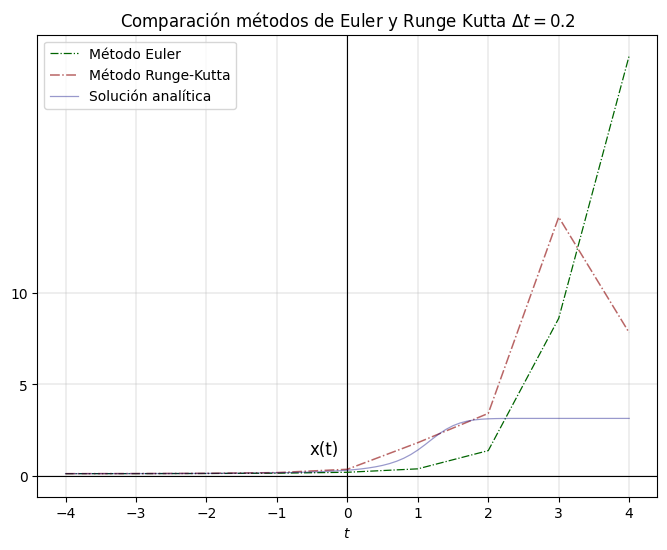

In [289]:
plt.figure(figsize=(8, 6))
plt.text(-0.54, 1.15, 'x(t)', rotation='horizontal', fontsize=12)  # Colocar 'x(t)' verticalmente
plt.xticks(np.arange(-4, 5, 1))  # Marcas cada unidad en el eje x
plt.yticks(np.arange(-30, 15, 5))  # Marcas cada unidad en el eje y
plt.grid(True, linewidth=0.3)  # Ajusta el ancho de las líneas de la cuadrícula
plt.axhline(0, color='black', linewidth=0.8)  # Línea horizontal en y=0
plt.axvline(0, color='black', linewidth=0.8)  # Línea vertical en x=0
plt.xlabel('$t$')
plt.plot(
    vector_T_euler,
    vector_X_euler,
    label="Método Euler",
    color='darkgreen',
    linestyle='-.',
    linewidth=0.9,
    markersize=12, 
)
plt.plot(
    vector_T_rk,
    vector_X_rk,
    label="Método Runge-Kutta",
    color='darkred',
    linestyle='-.',
    alpha = 0.6,
    linewidth=1.1,
    markersize=12, 
)
plt.plot(
    vector_T_funcion_real,
    vector_f_solucion,
    label="Solución analítica",
    color='navy',
    linestyle='-',
    alpha = 0.4,
    linewidth=0.9,
    markersize=12, 
)
plt.legend()  # Esto coloca la leyenda en la esquina superior izquierda
plt.title("Comparación métodos de Euler y Runge Kutta $\Delta t = 0.2$")
#plt.savefig("Comparación métodos de Euler y Runge Kutta $\Delta t = 0.2$.pdf")  # Con esta se guarda la imagen en formato pdf
plt.show()

### Grafica inicial

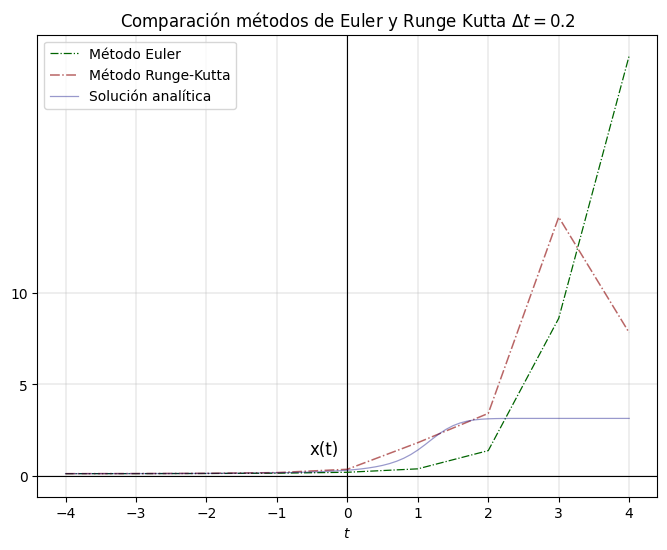

In [290]:
plt.figure(figsize=(8, 6))
plt.text(-0.54, 1.15, 'x(t)', rotation='horizontal', fontsize=12)  # Colocar 'x(t)' verticalmente
plt.xticks(np.arange(-4, 5, 1))  # Marcas cada unidad en el eje x
plt.yticks(np.arange(-30, 15, 5))  # Marcas cada unidad en el eje y
plt.grid(True, linewidth=0.3)  # Ajusta el ancho de las líneas de la cuadrícula
plt.axhline(0, color='black', linewidth=0.8)  # Línea horizontal en y=0
plt.axvline(0, color='black', linewidth=0.8)  # Línea vertical en x=0
plt.xlabel('$t$')
plt.plot(
    vector_T_euler,
    vector_X_euler,
    label="Método Euler",
    color='darkgreen',
    linestyle='-.',
    linewidth=0.9,
    markersize=12, 
)
plt.plot(
    vector_T_rk,
    vector_X_rk,
    label="Método Runge-Kutta",
    color='darkred',
    linestyle='-.',
    alpha = 0.6,
    linewidth=1.1,
    markersize=12, 
)
plt.plot(
    vector_T_funcion_real,
    vector_f_solucion,
    label="Solución analítica",
    color='navy',
    linestyle='-',
    alpha = 0.4,
    linewidth=0.9,
    markersize=12, 
)
plt.legend()  # Esto coloca la leyenda en la esquina superior izquierda
plt.title("Comparación métodos de Euler y Runge Kutta $\Delta t = 0.2$")
#plt.savefig("Comparación métodos de Euler y Runge Kutta $\Delta t = 0.2$.pdf")  # Con esta se guarda la imagen en formato pdf
plt.show()